In [20]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import math

In [6]:
from io import StringIO
import xml.etree.ElementTree as ET

def is_tip_line(line):
    return line[0:4] == 'time'


def split_file(file):
    lines = open(file, 'r').readlines()
    str_cycles = []
    current_cycle = ""
    for line in lines:
        if (is_tip_line(line)):
            str_cycles.append(current_cycle)
            current_cycle = line
        else:
            current_cycle += line
    str_cycles.append(current_cycle)
    str_cycles = str_cycles[1:]
    cycles = []
    for str_cycle in str_cycles:
        csv = pd.read_csv(StringIO(str_cycle))
        cycles.append([list(csv['input']), list(csv['output'])])
    return cycles

def compute_resistence(vi, vo):
    return (vi - vo) * (2000 / vo)

In [19]:
def get_resistance(data):
    resistances = []
    for i in range(len(data[0])):
        if (data[1][i] == 0):
            continue
#         print(data)
        resistances.append(compute_resistence(data[0][i], data[1][i]))
    if (len(resistances) < 5):
        return -1
    return sum(resistances) / len(resistances)

# stablity of resistance measurement
**ATTENTION: The chip seems need kinda warmup, performance at first not stable**  
In this file, we want to know how stable is the resistance of memresistor cells
### Measurement methods
First, we impose a -1.2V(greater than threshold); then we impose a measurement voltage which from 0.1V to 1.5V, and capture the input voltags and output voltages, further, we compute the resistance of the tested cell under these measurement voltages.

### Measure a cell's resistance at a certain voltage multi times and plot
We measure a cell's resistance in differnt voltages and plot the results.

In [8]:
def plot_stability(filename):
    data_set = split_file(filename)    
    rs = list(map(lambda data: get_resistance(data), data_set))
    print("maximum is ", max(rs))
    print("minimum is ", min(rs))
    print("avarage is ", sum(rs) / len(rs))
    plt.plot(list(range(len(rs))), rs)


maximum is  6960.428952431624
minimum is  4754.47290861567
avarage is  5792.800130743263


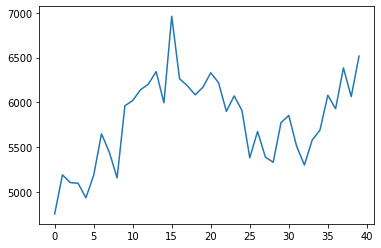

In [9]:
# Chip 2 Cell 16 Voltage 0.1
filename = "data/stability_2_16_100"
plot_stability(filename)

👆 is 40 time os the resistance figure of cell 16 of Chip 2 in Voltage 0.1;   
The range is about from 4754 - 6960; the average is about 5792.

maximum is  908.3169143135242
minimum is  584.825347391759
avarage is  720.930766225735


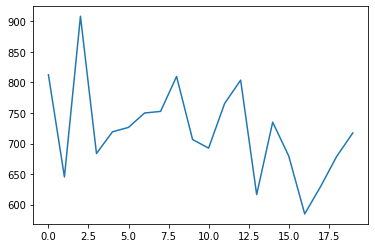

In [10]:
 # Chip 2 Cell 16 Voltage 0.4
filename = "data/stability_2_16_400"
plot_stability(filename)

👆 is 20 time os the resistance figure of cell 16 of Chip 2 in Voltage 0.4V;   
The range is about from 584 - 908; the average is about 720.

maximum is  547.5768633805204
minimum is  429.84778023041116
avarage is  494.83582737320404


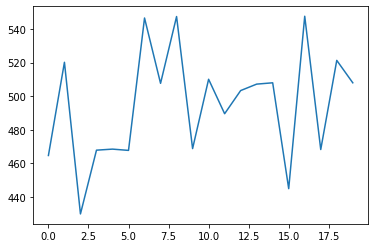

In [11]:
# Chip 2 Cell 16 Voltage 0.8
filename = "data/stability_2_16_800"
plot_stability(filename)

👆 is 20 time os the resistance figure of cell 16 of Chip 2 in Voltage 0.8V;   
The range is about from 429 - 547; the average is about 494.

maximum is  391.0028395459247
minimum is  336.2846128025213
avarage is  364.1351807547284


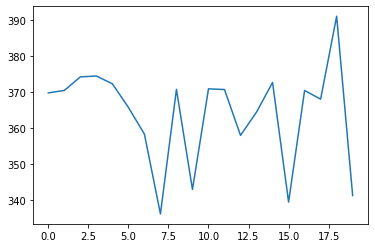

In [12]:
# Chip 2 Cell 16 Voltage 1.2
filename = "data/stability_2_16_1200"
plot_stability(filename)

👆 is 20 time os the resistance figure of cell 16 of Chip 2 in Voltage 1.2V;   
The range is about from 336 - 391; the average is about 364.

#### conclusion
We can draw a conclusion is the resistance measurement exists difference but(maybe) in a certain range. We can increase the measurement times(like 1000 times) to confirm that.   
Another obvious conclusion is the resistance decrease when the measurement voltage increase. But is this decrease stable?

# Measure resistance in different voltages
(*somtime the measurement can be nonsense, for example, with measurement voltage 0.1V the resistance could be really small, don't know why*)
We want to know if "the resistance decrease when the measurement voltage increase" is stable and how stable it is.
So we measure a cell in different measurement voltages multiple times and compare the results.

In [17]:
def parse_test(test):
    dic = {}
    for child in test:
        dic[child.tag] = child.text
    return dic

def get_avg_resistance(filename):
    data_set = split_file(filename)
    rs = list(map(lambda data: get_resistance(data), data_set))
    return sum(rs) / len(rs)

def plot_r(chip, cell, prefix, dir = 0):
    tree = ET.parse('data/meta.xml')
    tests = tree.getroot()
    rs = []
    vs = []
    for test in tests:
        dic = parse_test(test)
        if (int(dic['chip']) != chip or int(dic['cell']) != cell or prefix not in dic['file']):
            continue
        filename = dic['file']
#         if (dir != 0):
        filename = "/Users/lwh/CLionProjects/ce_device/test/data/measure_2_1_" + str(dir) + "/" + dic['file'].split("/")[-1]
#         r = get_avg_resistance(filename)
        if (r == -1):
            continue
        rs.append(r)
        vs.append((float)(dic['voltage']))
    plt.plot(vs[0:], rs[0:], label=str(chip)+'_'+str(cell)+'_'+str(dir))
    plt.legend()

    

FileNotFoundError: [Errno 2] No such file or directory: '/Users/lwh/CLionProjects/ce_device/test/data/measure_2_1_100'

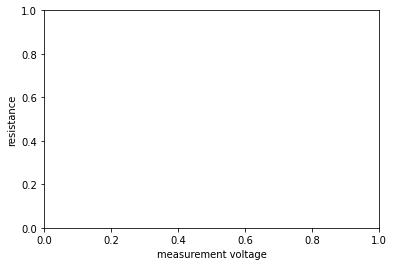

In [29]:
plt.ylabel("resistance")
plt.xlabel("measurement voltage")
# axes = plt.gca()
# axes.set_ylim([0,10000])
plot_r(2, 1, 'measure', 0)
plot_r(2, 1, 'measure', 1)
plot_r(2, 1, 'measure', 2)
plot_r(2, 1, 'measure', 3)
plot_r(2, 1, 'measure', 4)
plot_r(2, 1, 'measure', 5)

plt.figure()
plt.ylabel("resistance")
plt.xlabel("measurement voltage")
axes = plt.gca()
axes.set_ylim([0,3000])
plot_r(2, 1, 'measure', 0)
plot_r(2, 1, 'measure', 1)
plot_r(2, 1, 'measure', 2)
plot_r(2, 1, 'measure', 3)
plot_r(2, 1, 'measure', 4)
plot_r(2, 1, 'measure', 5)
# plt.axvline(x=5, ymin=0.1, ymax=0.9)

👆 We measured the resistance of cell 1 of Chip 2 in votages 0.1V - 1.5V, six times.   
We can see the resistance decreases with incresing measurement voltage overall. But there is a big gap when the measurement is between 0.1-0.4; when the measurement voltage continue to increase, the resistance decreases stably.  